In [5]:
import math
import pickle
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from UDFManager import *
from pyudf.rotation import Quaternion

plt.style.use('presentation')

In [11]:
RHO = 1.0
MU  = 1.0
a   = 5.0
h   = a / 2.0
gra = 0.06
PHI = 0.000998685

gravity = np.array([0.0, 1.0, 0.0]) * (gra * RHO * 4 / 3 * np.pi * (a**3))
gammadot = np.array([round(i * 0.001, 3) for i in range(5, 155, 5)])

In [12]:
viscosity_map = {}

In [21]:
# for j in range(4):
#     viscosities = np.array([pd.read_csv(f'{j:0=2}/udf/{i:0=3}/output.txt', header=None, names=['time', 'shear_rate', 'shear_strain', 'shear_stress', 'viscosity'], sep='\s+', comment="#")[10:]['viscosity'].values[-1] for i in tqdm(range(5, 155, 5))])
#     viscosity_map[f'{j:0=2}'] = viscosities
# with open('viscosity_map.pickle', 'wb') as f:
#     pickle.dump(viscosity_map, f)

In [22]:
with open('viscosity_map.pickle', 'rb') as f:
    viscosity_map = pickle.load(f)

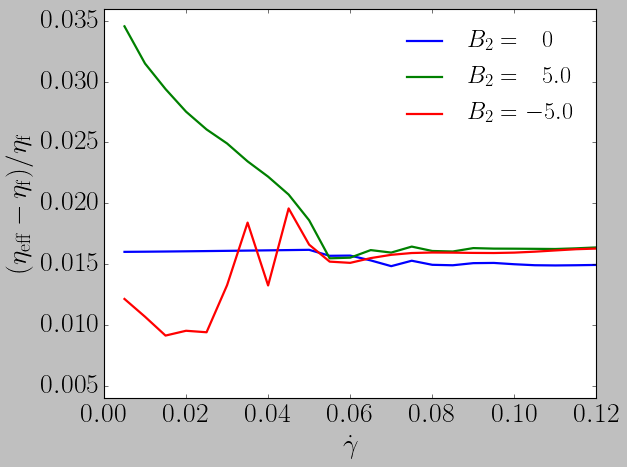

In [26]:
plt.xlim(0, 0.12)
plt.ylim(0.004, 0.036)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('$\dot{\gamma}$', fontsize=25)
plt.ylabel('$(\eta_\mathrm{eff} - \eta_\mathrm{f}) / \eta_\mathrm{f}$', fontsize=25)

plt.plot(gammadot, (viscosity_map['00'] - MU) / MU, label='$B_2=\ \ \,0$')
plt.plot(gammadot, (viscosity_map['01'] - MU) / MU, label='$B_2=\ \ \,5.0$')
plt.plot(gammadot, (viscosity_map['02'] - MU) / MU, label='$B_2=     -5.0$')
plt.legend(fontsize=22)
plt.tight_layout()
plt.savefig('../figs/sim04/effective_viscosity.png')